<a href="https://colab.research.google.com/github/hellybrine/TransactionalFraudDetection/blob/main/TransactionalFraudDetectPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Base Dataset**

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

 86% 57.0M/66.0M [00:00<00:00, 85.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 73.2MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

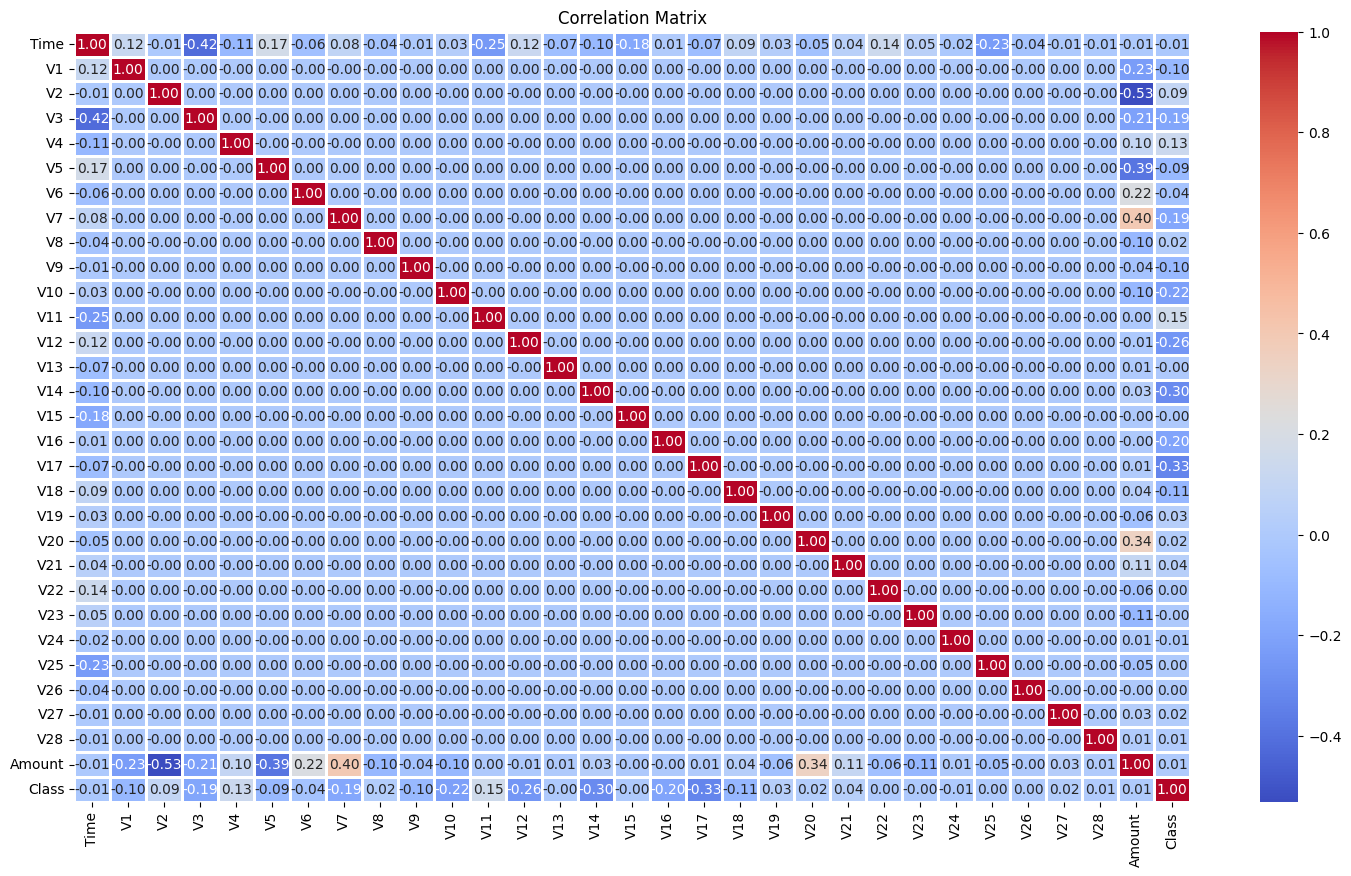

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('creditcard.csv')
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Accuracy: 0.9991924440855307


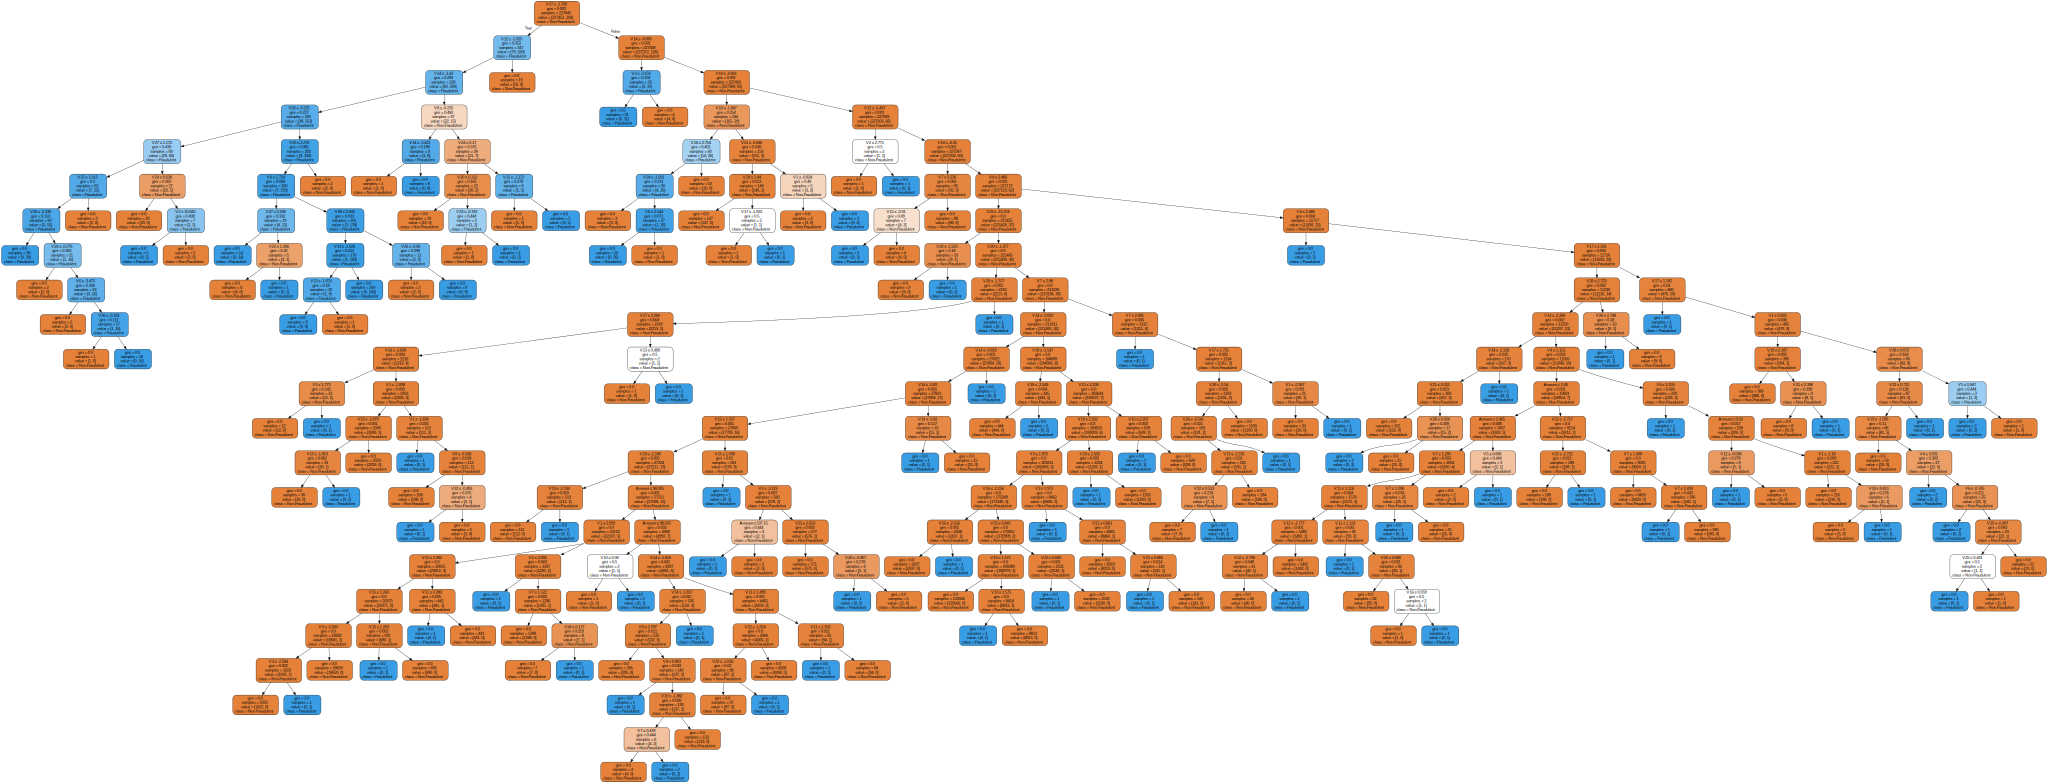

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

data = pd.read_csv('creditcard.csv')

X = data.drop(columns=['Time', 'Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['Non-Fraudulent', 'Fraudulent'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('creditcard_decision_tree', format='pdf', cleanup=True)

graph

Accuracy (C4.5): 0.9992802219023208


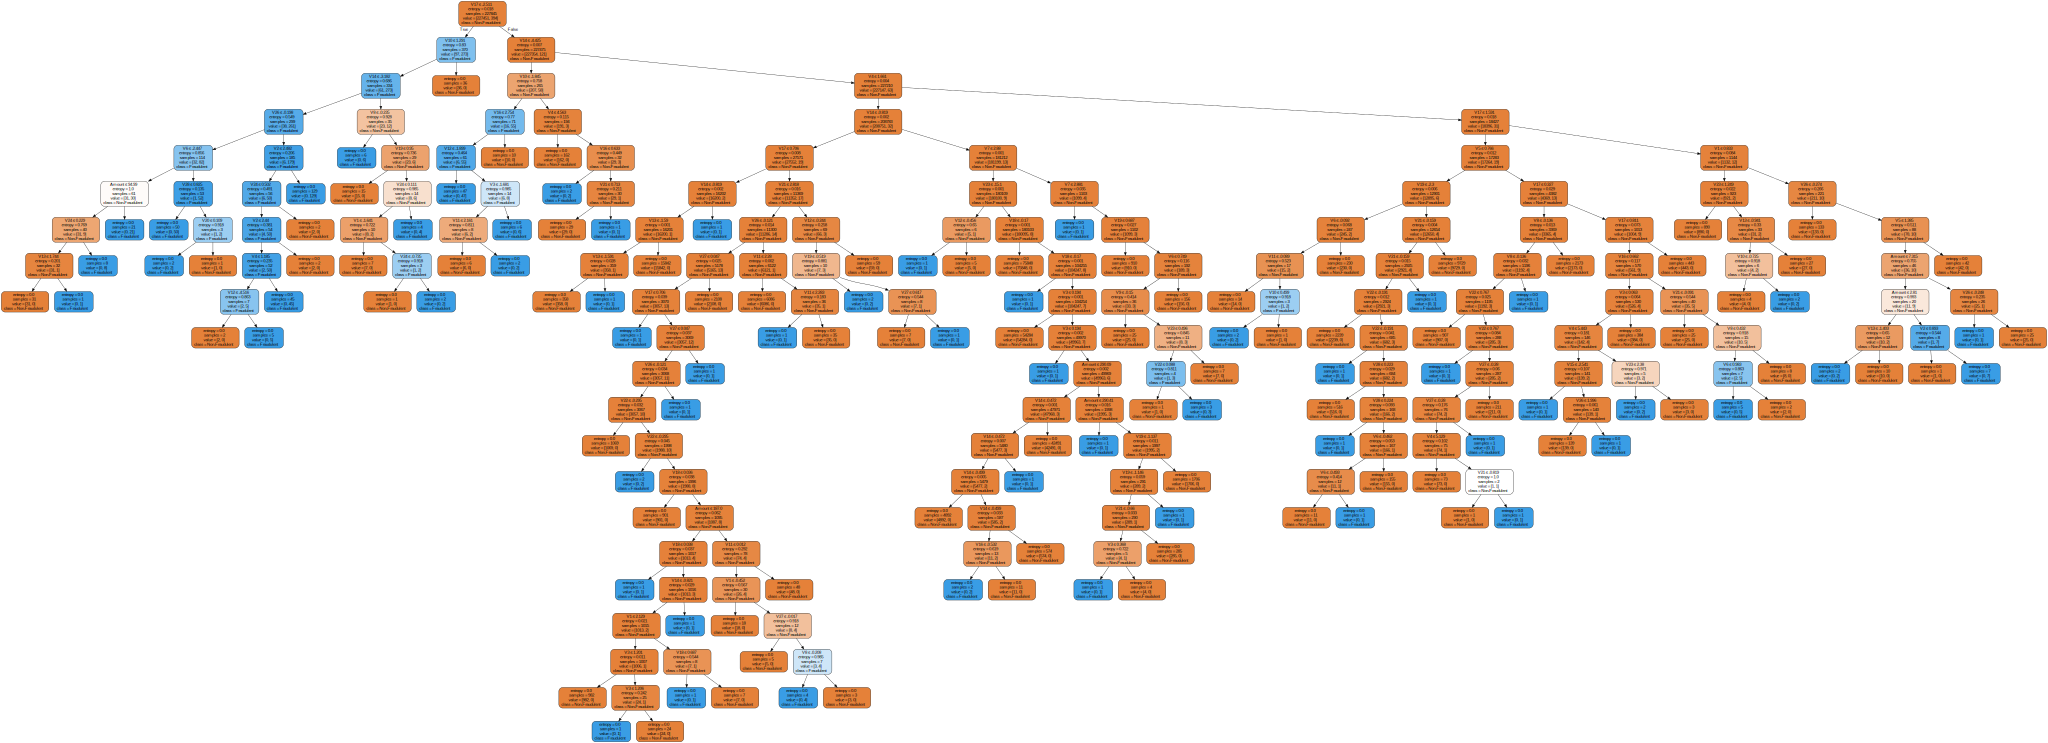

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

data = pd.read_csv('creditcard.csv')

X = data.drop(columns=['Time', 'Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_c45 = DecisionTreeClassifier(criterion='entropy')
clf_c45.fit(X_train, y_train)

y_pred_c45 = clf_c45.predict(X_test)

accuracy_c45 = accuracy_score(y_test, y_pred_c45)
print("Accuracy (C4.5):", accuracy_c45)

dot_data_c45 = export_graphviz(clf_c45, out_file=None,
                           feature_names=X.columns,
                           class_names=['Non-Fraudulent', 'Fraudulent'],
                           filled=True, rounded=True,
                           special_characters=True)

graph_c45 = graphviz.Source(dot_data_c45)
graph_c45.render('creditcard_decision_tree_c45', format='pdf', cleanup=True)

graph_c45

Accuracy (CART): 0.9990871107053826


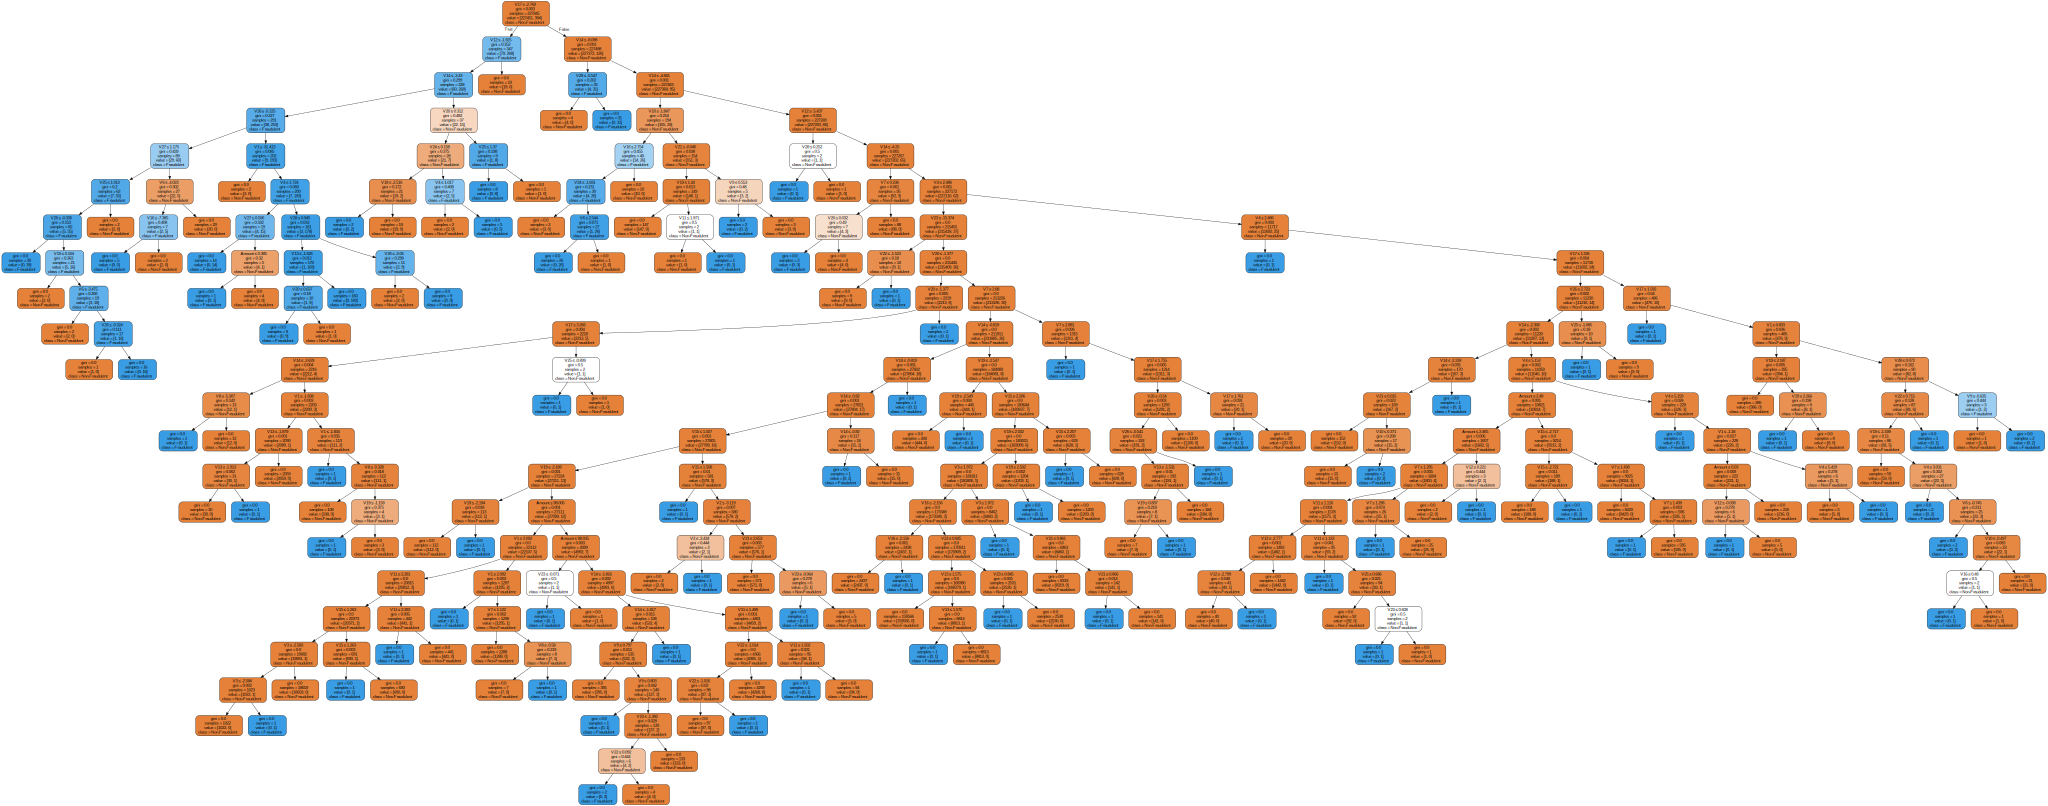

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

data = pd.read_csv('creditcard.csv')

X = data.drop(columns=['Time', 'Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_cart = DecisionTreeClassifier(criterion='gini')
clf_cart.fit(X_train, y_train)

y_pred_cart = clf_cart.predict(X_test)

accuracy_cart = accuracy_score(y_test, y_pred_cart)
print("Accuracy (CART):", accuracy_cart)

dot_data_cart = export_graphviz(clf_cart, out_file=None,
                           feature_names=X.columns,
                           class_names=['Non-Fraudulent', 'Fraudulent'],
                           filled=True, rounded=True,
                           special_characters=True)

graph_cart = graphviz.Source(dot_data_cart)
graph_cart.render('creditcard_decision_tree_cart', format='pdf', cleanup=True)
\
graph_cart

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

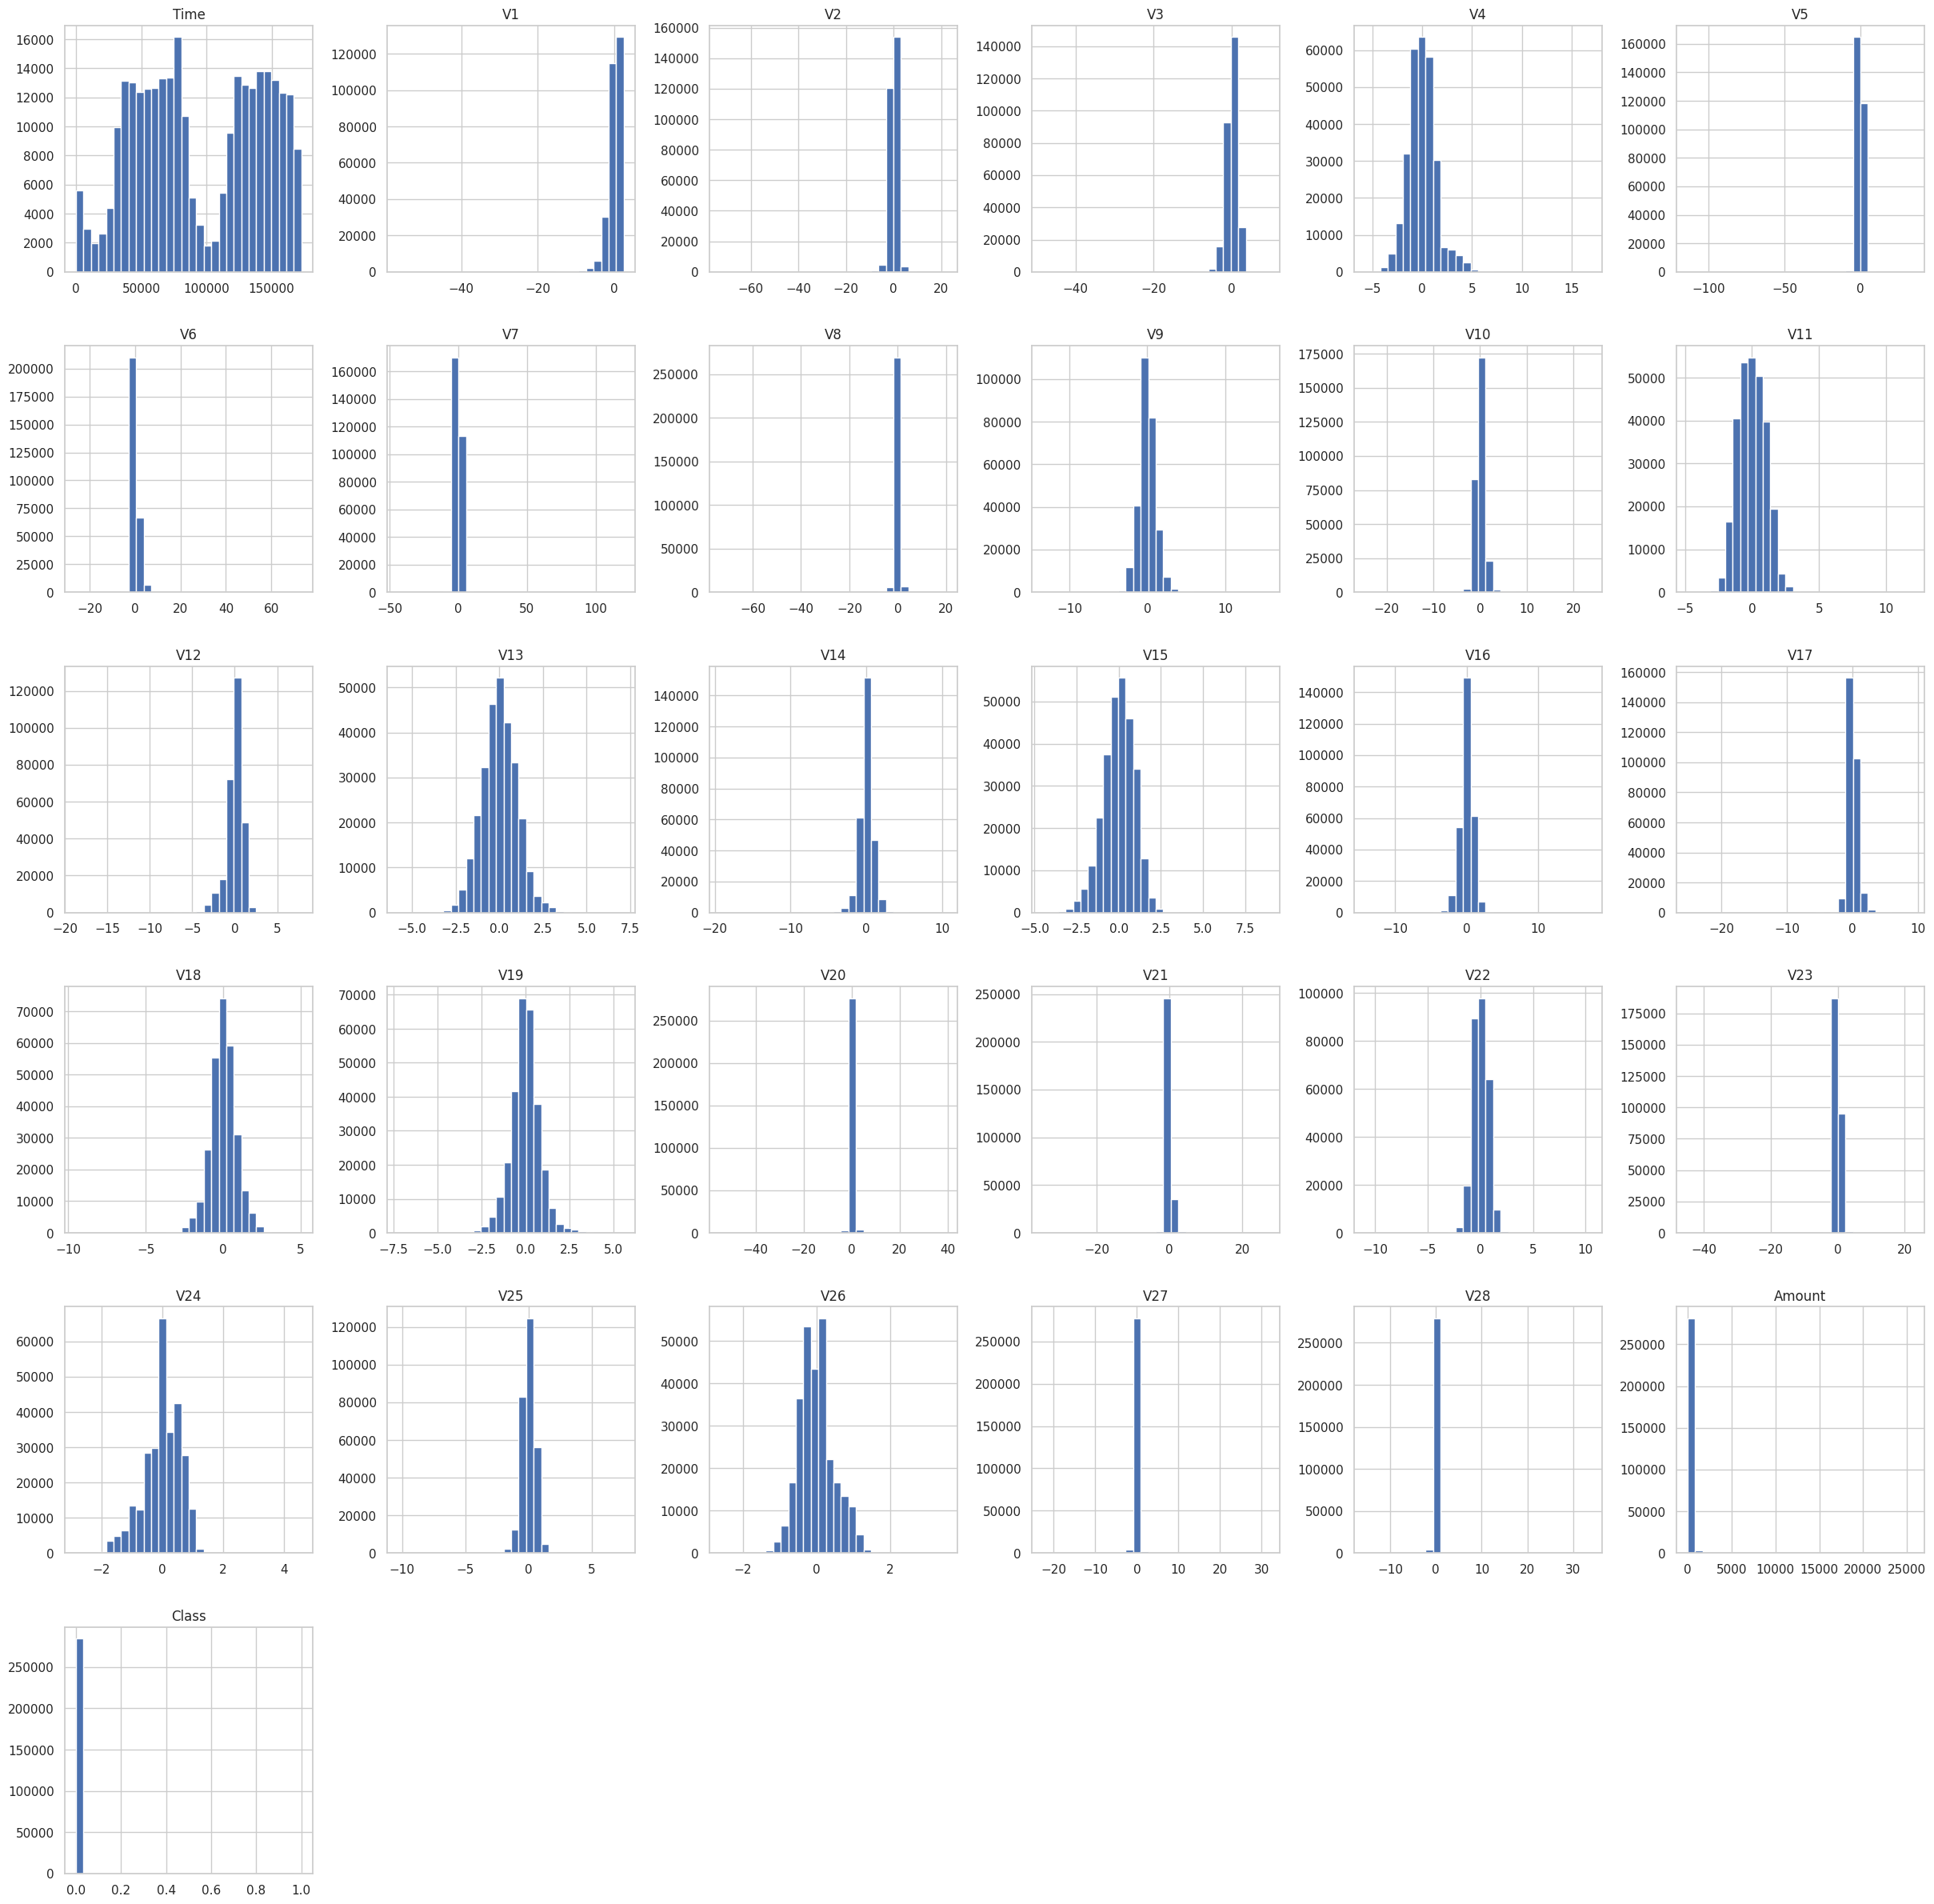

In [ ]:
df.hist(bins=30, figsize=(30,30))

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


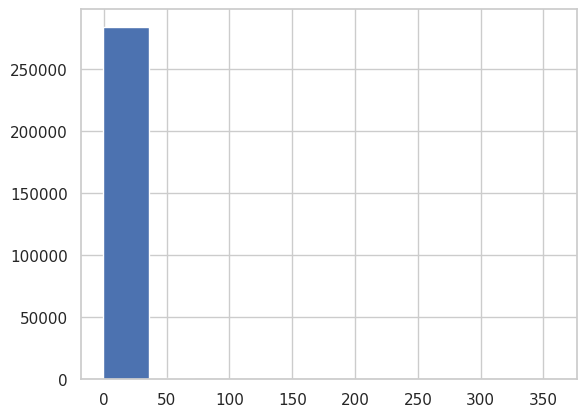

In [ ]:
from sklearn.preprocessing import RobustScaler
new_df=df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df['Amount'].hist()
new_df

In [ ]:
new_df['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [ ]:
new_df = new_df.sample(frac=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164700,0.676681,-0.311270,-0.234260,1.065236,-2.583321,-0.062821,0.395184,-0.080203,0.231385,-0.941351,...,0.505583,1.244992,-0.213632,0.112054,-0.159905,-0.207442,0.120794,0.149307,0.391253,0
206418,0.788237,1.840567,-1.687425,0.188143,-0.594900,-1.544341,0.795198,-1.636578,0.347504,0.722622,...,0.252088,0.801953,0.158400,0.768637,-0.370370,-0.242482,0.044619,-0.019873,1.298680,0
38415,0.227945,-1.003248,1.266156,1.309297,-1.353087,-0.096595,-1.060435,0.882678,-0.239831,0.520263,...,-0.142043,0.081006,0.011637,0.665971,-0.203335,0.745531,0.359884,0.047133,-0.289108,0
22079,0.185315,0.883968,-1.293327,1.317871,0.872046,-1.365215,1.583834,-1.291757,0.651806,0.325238,...,-0.486903,-0.719124,0.036298,-0.323949,0.167866,-0.389564,0.118768,0.039336,1.351219,0
33674,0.216057,-0.663618,1.372843,0.570650,-0.086483,0.147765,-0.497958,0.503348,0.332874,-0.688813,...,-0.247793,-0.761648,-0.015839,-0.492242,0.024610,0.122276,0.117699,0.031075,0.111786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116754,0.430657,0.217429,-2.763628,0.301261,0.031647,-2.000939,0.149481,-0.359628,-0.049977,0.161975,...,0.327967,-0.258352,-0.578577,-0.066011,0.215149,-0.275654,-0.062625,0.123661,8.208622,0
136345,0.472591,-0.389056,1.051399,1.255455,0.017590,0.176486,-0.517435,0.621051,0.083675,-0.348511,...,-0.238415,-0.602763,0.025249,0.013178,-0.243835,0.102619,0.258953,0.094351,-0.223713,0
128167,0.455015,-2.073640,2.078947,0.838755,1.697258,-0.159115,-0.007312,0.274888,0.304156,-0.492917,...,0.087352,-0.071772,0.091002,0.025380,-0.038159,-0.157432,-0.848834,0.164745,-0.081604,0
48287,0.252188,-0.453240,-0.627200,1.740273,-2.406306,-1.287454,-0.590506,0.023236,-0.071926,-2.713232,...,-0.102047,-0.192239,0.359857,0.481151,-0.592172,-0.669414,0.124128,0.162004,1.337246,0


In [ ]:
train, test, val = new_df[:240000],new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239563
 1       437
 Name: count, dtype: int64,
 Class
 0    21963
 1       37
 Name: count, dtype: int64,
 Class
 0    22789
 1       18
 Name: count, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [ ]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

# **Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_text

clf = DecisionTreeClassifier(criterion="entropy")

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tree_rules = export_text(clf, feature_names=list(range(x_train.shape[1])))

print(tree_rules)

|--- 17 <= -2.51
|   |--- 12 <= -2.18
|   |   |--- 9 <= -4.03
|   |   |   |--- class: 1.0
|   |   |--- 9 >  -4.03
|   |   |   |--- 10 <= -9.01
|   |   |   |   |--- 16 <= -10.99
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- 16 >  -10.99
|   |   |   |   |   |--- 4 <= 6.17
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- 4 >  6.17
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- 10 >  -9.01
|   |   |   |   |--- 14 <= -3.92
|   |   |   |   |   |--- 20 <= 0.39
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- 20 >  0.39
|   |   |   |   |   |   |--- 15 <= 0.93
|   |   |   |   |   |   |   |--- 4 <= 1.89
|   |   |   |   |   |   |   |   |--- 8 <= 0.24
|   |   |   |   |   |   |   |   |   |--- 29 <= -0.13
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- 29 >  -0.13
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- 8 >  0.24
|   |   |   |   |   |   |   |   | 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, clf.predict(x_val), target_names=['Valid', 'Fraud']))

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     22789
       Fraud       0.48      0.56      0.51        18

    accuracy                           1.00     22807
   macro avg       0.74      0.78      0.76     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

c45_clf = DecisionTreeClassifier(criterion="entropy", splitter="best")

c45_clf.fit(x_train, y_train)

y_pred_c45 = c45_clf.predict(x_test)

accuracy_c45 = accuracy_score(y_test, y_pred_c45)
precision_c45 = precision_score(y_test, y_pred_c45)
recall_c45 = recall_score(y_test, y_pred_c45)
f1_c45 = f1_score(y_test, y_pred_c45)

c45_tree_rules = export_text(c45_clf, feature_names=list(range(x_train.shape[1])))

print("C4.5 Algorithm:")
print(c45_tree_rules)

print(classification_report(y_val, clf.predict(x_val), target_names=['Valid', 'Fraud']))

C4.5 Algorithm:
|--- 17 <= -2.51
|   |--- 12 <= -2.18
|   |   |--- 9 <= -4.03
|   |   |   |--- class: 1.0
|   |   |--- 9 >  -4.03
|   |   |   |--- 17 <= -13.77
|   |   |   |   |--- 22 <= -0.19
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- 22 >  -0.19
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- 17 >  -13.77
|   |   |   |   |--- 14 <= -3.92
|   |   |   |   |   |--- 20 <= 0.39
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- 20 >  0.39
|   |   |   |   |   |   |--- 15 <= 0.93
|   |   |   |   |   |   |   |--- 4 <= 1.89
|   |   |   |   |   |   |   |   |--- 28 <= 0.24
|   |   |   |   |   |   |   |   |   |--- 29 <= -0.13
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- 29 >  -0.13
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- 28 >  0.24
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- 4 >  1.89
|   |   |   |   |   |   |   |   |--

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
cart_clf = DecisionTreeClassifier(criterion="gini", splitter="best")

cart_clf.fit(x_train, y_train)

y_pred_cart = cart_clf.predict(x_test)

accuracy_cart = accuracy_score(y_test, y_pred_cart)
precision_cart = precision_score(y_test, y_pred_cart)
recall_cart = recall_score(y_test, y_pred_cart)
f1_cart = f1_score(y_test, y_pred_cart)

cart_tree_rules = export_text(cart_clf, feature_names=list(range(x_train.shape[1])))

print("\nCART Algorithm:")
print(cart_tree_rules)

print(classification_report(y_val, clf.predict(x_val), target_names=['Valid', 'Fraud']))


CART Algorithm:
|--- 17 <= -2.75
|   |--- 12 <= -2.18
|   |   |--- 14 <= -3.43
|   |   |   |--- 26 <= -0.26
|   |   |   |   |--- 27 <= 1.08
|   |   |   |   |   |--- 5 <= -0.01
|   |   |   |   |   |   |--- 19 <= 2.54
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- 19 >  2.54
|   |   |   |   |   |   |   |--- 27 <= -0.46
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- 27 >  -0.46
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- 5 >  -0.01
|   |   |   |   |   |   |--- 4 <= 2.53
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- 4 >  2.53
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- 27 >  1.08
|   |   |   |   |   |--- 24 <= 0.04
|   |   |   |   |   |   |--- 26 <= -0.27
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- 26 >  -0.27
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- 24 >  0.04
|   |   |   |   |   |   |--- class: 1

# **Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression()
Logmodel.fit(x_train, y_train)
Logmodel.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991458333333333

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, Logmodel.predict(x_val), target_names=['Valid', 'Fraud']))

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     22789
       Fraud       0.73      0.44      0.55        18

    accuracy                           1.00     22807
   macro avg       0.86      0.72      0.78     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid')) ## probability : (values between 0 & 1)

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
 batch_normalization (Batch  (None, 2)                 8         
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [ ]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.0510 - accuracy: 0.9893 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 2/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 3/5
7500/7500 [==============================] - 21s 3ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 4/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 5/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9997


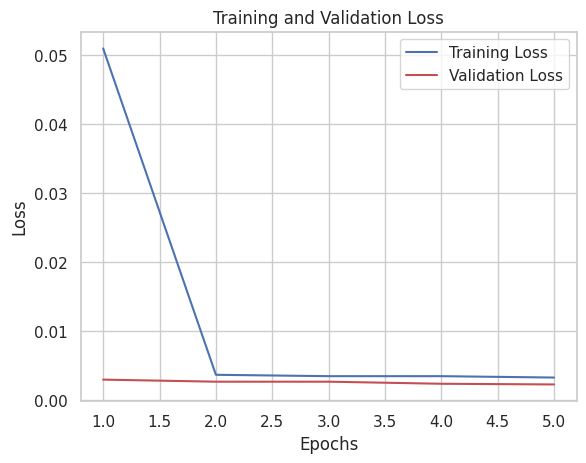

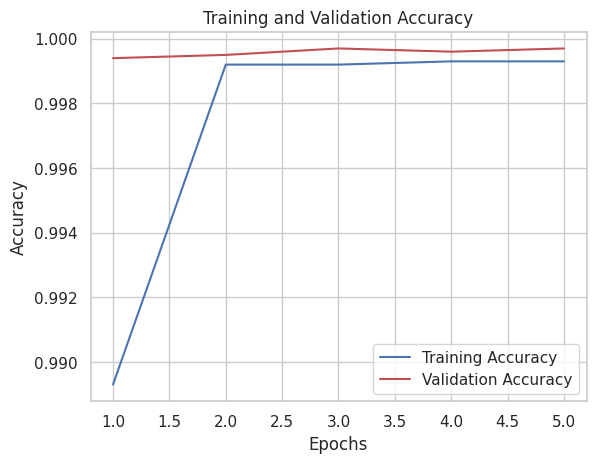

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 6)
loss_history = [0.0510, 0.0037, 0.0035, 0.0035, 0.0033]
accuracy_history = [0.9893, 0.9992, 0.9992, 0.9993, 0.9993]
val_loss_history = [0.0030, 0.0027, 0.0027, 0.0024, 0.0023]
val_accuracy_history = [0.9994, 0.9995, 0.9997, 0.9996, 0.9997]

plt.plot(epochs, loss_history, 'b', label='Training Loss')
plt.plot(epochs, val_loss_history, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, accuracy_history, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_history, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def neural_net(mode, x):
 return (shallow_nn.predict(x).flatten() > 0.5).astype(int)
neural_net(shallow_nn, x_val)

713/713 [==============================] - 1s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_val, neural_net(shallow_nn, x_val), target_names=['Valid', 'Fraud']))

713/713 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     22761
       Fraud       0.86      0.91      0.88        46

    accuracy                           1.00     22807
   macro avg       0.93      0.96      0.94     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Valid', 'Fraud']))

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     22761
       Fraud       0.92      0.74      0.82        46

    accuracy                           1.00     22807
   macro avg       0.96      0.87      0.91     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Valid', 'Fraud']))

KeyboardInterrupt: 

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Valid', 'Fraud']))

NameError: name 'x_train' is not defined

# **BALANCING THE DATASET**

In [ ]:
new_df

NameError: name 'new_df' is not defined

In [ ]:
valids = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
valids['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [ ]:
balanced_df = pd.concat([frauds, valids.sample(len(frauds))])
balanced_df['Class'].value_counts()
## total val = 984

Class
1    492
0    492
Name: count, dtype: int64

In [ ]:
balanced_df['Amount'].describe()

count    984.000000
mean       1.190190
std        3.568052
min       -0.307413
25%       -0.289387
50%       -0.094669
75%        1.089779
max       42.314958
Name: Amount, dtype: float64

In [ ]:
balaced_df = balanced_df.sample(frac=1, random_state=1)
balaced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
98443,0.385799,-1.138798,0.748340,1.800838,-0.641991,-0.395896,0.808956,-0.436154,1.025620,0.258385,...,-0.007184,0.024892,-0.182403,-0.663510,-0.026986,0.367778,0.188094,0.077337,-0.204010,0
101509,0.392709,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,-0.649377,...,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,4.164047,1
27738,0.200727,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1
197549,0.764329,-0.521183,1.763434,-1.049135,0.997787,1.155562,-0.375784,1.043088,0.365518,-1.160345,...,0.128175,0.488294,-0.202450,0.588362,0.039827,-0.425398,0.319326,0.212034,0.012716,0
204829,0.784000,-0.850789,0.066808,0.529933,-1.148760,0.098955,-0.407561,0.016453,0.075929,-1.243083,...,0.047531,0.273590,-0.318484,-0.462601,0.780418,0.135979,0.318798,0.148742,0.709146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157099,0.633750,-0.631087,0.519645,2.023042,-0.518885,0.947793,1.763360,0.140195,0.390574,1.447748,...,-0.225580,-0.187395,-0.277414,-1.764955,0.072325,-0.612548,-0.044665,-0.174691,-0.149934,0
6427,0.044041,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,-0.293440,1
99770,0.389318,1.089627,-0.679660,0.850049,0.672050,-1.253604,-0.340016,-0.520758,-0.127295,-0.621782,...,-0.165224,-0.022153,-0.159663,0.413168,0.523077,-0.237889,0.064952,0.055321,1.313491,0
106998,0.406437,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,-0.254454,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train_b, x_temp, y_train_b, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_test_b, x_val_b, y_test_b, y_val_b = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


NameError: name 'x' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

clf = DecisionTreeClassifier(criterion="entropy")

clf.fit(x_train_b, y_train_b)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tree_rules = export_text(clf, feature_names=list(range(x_train_b.shape[1])))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Decision Tree Rules:")
print(tree_rules)

NameError: name 'x_train_b' is not defined

In [ ]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    394
 0    393
 Name: count, dtype: int64,
 0    49
 1    49
 Name: count, dtype: int64,
 0    50
 1    49
 Name: count, dtype: int64)

In [ ]:
Logmodel_b = LogisticRegression()
Logmodel_b.fit(x_train_b, y_train_b)
Logmodel_b.score(x_train_b, y_train_b)
print(classification_report(y_val_b, Logmodel_b.predict(x_val_b), target_names=['Valid', 'Fraud']))

              precision    recall  f1-score   support

       Valid       0.96      1.00      0.98        50
       Fraud       1.00      0.96      0.98        49

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



In [ ]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
25/25 [==============================] - 2s 43ms/step - loss: 1.0566 - accuracy: 0.3571 - val_loss: 0.9797 - val_accuracy: 0.4646
Epoch 2/40
25/25 [==============================] - 1s 32ms/step - loss: 0.8143 - accuracy: 0.5159 - val_loss: 0.6560 - val_accuracy: 0.5859
Epoch 3/40
25/25 [==============================] - 1s 31ms/step - loss: 0.6427 - accuracy: 0.6582 - val_loss: 0.5461 - val_accuracy: 0.7576
Epoch 4/40
25/25 [==============================] - 1s 40ms/step - loss: 0.5785 - accuracy: 0.7370 - val_loss: 0.4904 - val_accuracy: 0.7980
Epoch 5/40
25/25 [==============================] - 1s 55ms/step - loss: 0.5305 - accuracy: 0.8030 - val_loss: 0.4506 - val_accuracy: 0.8384
Epoch 6/40
25/25 [==============================] - 1s 35ms/step - loss: 0.4969 - accuracy: 0.8450 - val_loss: 0.4217 - val_accuracy: 0.8586
Epoch 7/40
25/25 [==============================] - 1s 43ms/step - loss: 0.4640 - accuracy: 0.8475 - val_loss: 0.3935 - val_accuracy: 0.8889
Epoch 8/40
25

In [ ]:
print(classification_report(y_val_b, neural_net(shallow_nn_b, x_val_b), target_names=['Valid', 'Fraud']))

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       Valid       0.55      0.32      0.41        50
       Fraud       0.51      0.73      0.61        49

    accuracy                           0.53        99
   macro avg       0.53      0.53      0.51        99
weighted avg       0.53      0.53      0.50        99



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Valid', 'Fraud']))

              precision    recall  f1-score   support

       Valid       0.91      1.00      0.95        50
       Fraud       1.00      0.90      0.95        49

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
gbc.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b), target_names=['Valid', 'Fraud']))

              precision    recall  f1-score   support

       Valid       0.96      0.94      0.95        50
       Fraud       0.94      0.96      0.95        49

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



In [ ]:
from sklearn.svm import LinearSVC
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc_b.predict(x_val_b), target_names=['Valid', 'Fraud']))

              precision    recall  f1-score   support

       Valid       0.96      0.98      0.97        50
       Fraud       0.98      0.96      0.97        49

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
save_dir = '/content/drive/My Drive/ML_Projects'

In [ ]:
import joblib

joblib.dump(Logmodel_b, os.path.join(save_dir, 'Logistic_Regression_Model.pkl'))
shallow_nn_b.save(os.path.join(save_dir, 'Shallow_Neural_Network_Model.h5'))
joblib.dump(rf, os.path.join(save_dir, 'Random_Forest_Model.pkl'))
joblib.dump(gbc, os.path.join(save_dir, 'Gradient_Boosting_Model.pkl'))
joblib.dump(svc_b, os.path.join(save_dir, 'SVM_Model.pkl'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/content/drive/My Drive/ML_Projects/SVM_Model.pkl']

In [ ]:
drive.flush_and_unmount()
print('Google Drive unmounted.')

Google Drive unmounted.
